# Flight cancellations data illustration

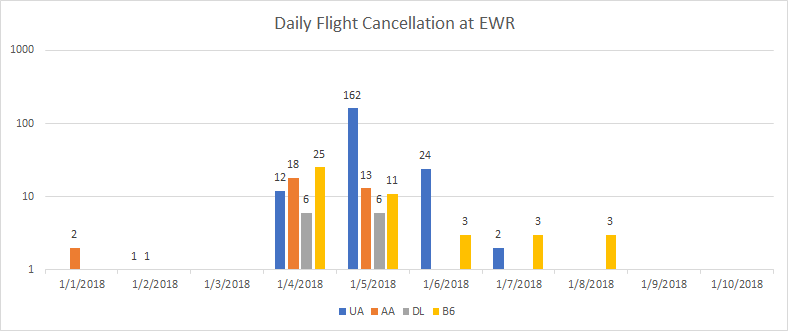

In [1]:
from IPython.display import Image
Image(filename='plot_flight_cancellations.png')

The plot shows the number of flight cancellations at EWR during 1/1/2018 - 1/10/2018.

The data was collected from https://www.transtats.bts.gov/ONTIME/Cancellations.aspx

There was a winter storm in 1/4-1/5 in NJ area.

We can see UA has got big impact, lots of cancellations. However, need to check the regular daily flight number, then we can evaluate the percentage of cancellations among total flights. 

While other two airlines, AA and DL, have only cancellations on two days, UA took extra day 1/6 to recover. But EWR is UA's hub, the total daily flight number should be much higher than other airlines. So we may need to compare on relative scale.

AA and DL were doing fine, just were hit for two days.

B6, JetBlue, took extra 3 days to recover. I assume the total number of flighta of B6 will be much less than UA's. So we may check more in data to see if we can reveal any cause of the longer time for recovery.

The results from the project will be able to provide addtional guidelines or references for choosing airlines.

Some airlines are more resilient to weather events than others. 

So the data can support my proposal for the project.  

From https://www.ncdc.noaa.gov/data-access/quick-links#loc-clim, we may collected weather conditions at many airports with sub-hours time resolution.

And from https://www.transtats.bts.gov, we may collected daily flight state data for each flight in US.

So we have sufficient data to do the study proposed.


The following are some illustrations of the raw weather data and flight cancellation data collceted from publich sources, as listed above.

In [2]:
import pandas as pd
import numpy as np
import os
%matplotlib inline  

In [3]:
wdf=pd.read_csv('./data/1531545.csv',  low_memory=False)

In [6]:
wdf.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,REPORTTPYE,HOURLYSKYCONDITIONS,HOURLYVISIBILITY,HOURLYPRSENTWEATHERTYPE,...,MonthlyMaxSeaLevelPressureTime,MonthlyMinSeaLevelPressureValue,MonthlyMinSeaLevelPressureDate,MonthlyMinSeaLevelPressureTime,MonthlyTotalHeatingDegreeDays,MonthlyTotalCoolingDegreeDays,MonthlyDeptFromNormalHeatingDD,MonthlyDeptFromNormalCoolingDD,MonthlyTotalSeasonToDateHeatingDD,MonthlyTotalSeasonToDateCoolingDD
0,WBAN:14734,NEWARK LIBERTY INTERNATIONAL AIRPORT NJ US,2.1,40.6825,-74.1694,2010-01-01 00:15,FM-16,FEW:02 14 BKN:07 28 OVC:08 47,2.00,-RA:02 BR:1 |RA:61 |RA:61,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
1,WBAN:14734,NEWARK LIBERTY INTERNATIONAL AIRPORT NJ US,2.1,40.6825,-74.1694,2010-01-01 00:49,FM-16,BKN:07 7 OVC:08 14,2.00,-RA:02 BR:1 |RA:61 |RA:61,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
2,WBAN:14734,NEWARK LIBERTY INTERNATIONAL AIRPORT NJ US,2.1,40.6825,-74.1694,2010-01-01 00:51,FM-15,BKN:07 7 OVC:08 14,2.00,-RA:02 BR:1 |RA:61 |RA:61,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
3,WBAN:14734,NEWARK LIBERTY INTERNATIONAL AIRPORT NJ US,2.1,40.6825,-74.1694,2010-01-01 01:00,FM-12,NaN,1.99,||RA:61,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
4,WBAN:14734,NEWARK LIBERTY INTERNATIONAL AIRPORT NJ US,2.1,40.6825,-74.1694,2010-01-01 01:51,FM-15,BKN:07 7 OVC:08 14,2.00,-RA:02 BR:1 |RA:61 |RA:61,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106597 entries, 0 to 106596
Data columns (total 90 columns):
STATION                              106597 non-null object
STATION_NAME                         106597 non-null object
ELEVATION                            106597 non-null float64
LATITUDE                             106597 non-null float64
LONGITUDE                            106597 non-null float64
DATE                                 106597 non-null object
REPORTTPYE                           106597 non-null object
HOURLYSKYCONDITIONS                  92518 non-null object
HOURLYVISIBILITY                     95502 non-null object
HOURLYPRSENTWEATHERTYPE              20648 non-null object
HOURLYDRYBULBTEMPF                   103355 non-null object
HOURLYDRYBULBTEMPC                   103355 non-null object
HOURLYWETBULBTEMPF                   103189 non-null float64
HOURLYWETBULBTEMPC                   103189 non-null float64
HOURLYDewPointTempF                  103350 non

In [7]:
wdf.describe()

,ELEVATION,LATITUDE,LONGITUDE,HOURLYWETBULBTEMPF,HOURLYWETBULBTEMPC,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindGustSpeed,HOURLYPressureTendency,DAILYMaximumDryBulbTemp,...,MonthlyDaysWithGT010Precip,MonthlyDaysWithGT1Snow,MonthlyMaxSeaLevelPressureValue,MonthlyMaxSeaLevelPressureDate,MonthlyMaxSeaLevelPressureTime,MonthlyMinSeaLevelPressureValue,MonthlyMinSeaLevelPressureDate,MonthlyMinSeaLevelPressureTime,MonthlyTotalSeasonToDateHeatingDD,MonthlyTotalSeasonToDateCoolingDD
count,1.065970e+05,1.065970e+05,1.065970e+05,103189.000000,103189.000000,103350.000000,103246.000000,18815.000000,37761.000000,11452.000000,...,0.0,0.0,0.0,106597.0,106597.0,0.0,106597.0,106597.0,0.0,0.0
mean,2.100000e+00,4.068250e+01,-7.416940e+01,50.118840,10.066892,64.542680,9.245985,25.027425,4.381690,64.010391,...,NaN,NaN,NaN,-9999.0,-9999.0,NaN,-9999.0,-9999.0,NaN,NaN
std,3.816076e-12,8.370233e-11,1.317352e-11,16.457888,9.143670,20.619443,5.503708,6.143780,2.758643,18.833986,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN
min,2.100000e+00,4.068250e+01,-7.416940e+01,-1.000000,-18.300000,8.000000,0.000000,14.000000,0.000000,10.000000,...,NaN,NaN,NaN,-9999.0,-9999.0,NaN,-9999.0,-9999.0,NaN,NaN
25%,2.100000e+00,4.068250e+01,-7.416940e+01,37.000000,2.600000,48.000000,6.000000,21.000000,2.000000,49.000000,...,NaN,NaN,NaN,-9999.0,-9999.0,NaN,-9999.0,-9999.0,NaN,NaN
50%,2.100000e+00,4.068250e+01,-7.416940e+01,51.000000,10.800000,65.000000,8.000000,24.000000,3.000000,65.000000,...,NaN,NaN,NaN,-9999.0,-9999.0,NaN,-9999.0,-9999.0,NaN,NaN
75%,2.100000e+00,4.068250e+01,-7.416940e+01,65.000000,18.100000,82.000000,13.000000,28.000000,8.000000,80.000000,...,NaN,NaN,NaN,-9999.0,-9999.0,NaN,-9999.0,-9999.0,NaN,NaN
max,2.100000e+00,4.068250e+01,-7.416940e+01,81.000000,27.400000,114.000000,48.000000,78.000000,8.000000,108.000000,...,NaN,NaN,NaN,-9999.0,-9999.0,NaN,-9999.0,-9999.0,NaN,NaN


In [13]:
fcdf = pd.read_csv('./data/Detailed_Statistics_Cancellation_v2_UA_EWR_2017.csv')

In [17]:
fcdf.head()

,Carrier Code,Date (MM/DD/YYYY),Flight_Number,Tail Number,Destination Airport
0,UA,01/04/2017,418.0,N773UA,SFO
1,UA,01/04/2017,1865.0,NaN,EGE
2,UA,01/06/2017,523.0,NaN,DEN
3,UA,01/06/2017,568.0,NaN,ATL
4,UA,01/06/2017,607.0,NaN,ATL


In [18]:
fcdf[0:100]

,Carrier Code,Date (MM/DD/YYYY),Flight_Number,Tail Number,Destination Airport
0,UA,01/04/2017,418.0,N773UA,SFO
1,UA,01/04/2017,1865.0,NaN,EGE
2,UA,01/06/2017,523.0,NaN,DEN
3,UA,01/06/2017,568.0,NaN,ATL
4,UA,01/06/2017,607.0,NaN,ATL
5,UA,01/06/2017,1746.0,NaN,FLL
6,UA,01/06/2017,1774.0,NaN,FLL
7,UA,01/06/2017,1790.0,NaN,FLL
8,UA,01/06/2017,1849.0,NaN,ATL
9,UA,01/06/2017,1970.0,NaN,ATL


In [19]:
fcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 5 columns):
Carrier Code           709 non-null object
Date (MM/DD/YYYY)      708 non-null object
Flight_Number          708 non-null float64
Tail Number            20 non-null object
Destination Airport    708 non-null object
dtypes: float64(1), object(4)
memory usage: 27.8+ KB


In [14]:
fdelay_df = pd.read_csv('./data/Detailed_Statistics_Departures_v2_UA_EWR_2017.csv')

In [15]:
fdelay_df[0:50]

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,UA,01/01/2017,15.0,N66051,HNL,08:45,09:14,686.0,685.0,29.0,09:35,21.0,28.0,0.0,0.0,0.0,0.0
1,UA,01/01/2017,54.0,N11206,BOS,18:15,18:10,76.0,65.0,-5.0,18:32,22.0,0.0,0.0,0.0,0.0,0.0
2,UA,01/01/2017,55.0,N18243,FLL,15:30,15:40,191.0,180.0,10.0,16:01,21.0,0.0,0.0,0.0,0.0,0.0
3,UA,01/01/2017,66.0,N78506,SAN,07:40,07:44,376.0,350.0,4.0,08:00,16.0,0.0,0.0,0.0,0.0,0.0
4,UA,01/01/2017,67.0,N435UA,SRQ,09:30,09:54,191.0,169.0,24.0,10:06,12.0,0.0,0.0,0.0,0.0,0.0
5,UA,01/01/2017,69.0,N64809,IAH,13:00,13:02,245.0,236.0,2.0,13:21,19.0,0.0,0.0,0.0,0.0,0.0
6,UA,01/01/2017,174.0,N473UA,RSW,12:45,12:42,192.0,172.0,-3.0,12:56,14.0,0.0,0.0,0.0,0.0,0.0
7,UA,01/01/2017,212.0,N12125,SFO,15:59,16:04,387.0,371.0,5.0,16:22,18.0,0.0,0.0,0.0,0.0,0.0
8,UA,01/01/2017,228.0,N479UA,MSP,17:59,18:45,189.0,174.0,46.0,19:06,21.0,13.0,0.0,0.0,0.0,18.0
9,UA,01/01/2017,275.0,N41135,LAX,17:29,17:30,375.0,369.0,1.0,17:52,22.0,0.0,0.0,0.0,0.0,0.0


In [16]:
fdelay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54839 entries, 0 to 54838
Data columns (total 17 columns):
Carrier Code                                54839 non-null object
Date (MM/DD/YYYY)                           54838 non-null object
Flight Number                               54838 non-null float64
Tail Number                                 54150 non-null object
Destination Airport                         54838 non-null object
Scheduled departure time                    54838 non-null object
Actual departure time                       54838 non-null object
Scheduled elapsed time (Minutes)            54838 non-null float64
Actual elapsed time (Minutes)               54838 non-null float64
Departure delay (Minutes)                   54838 non-null float64
Wheels-off time                             54838 non-null object
Taxi-Out time (Minutes)                     54838 non-null float64
Delay Carrier (Minutes)                     54838 non-null float64
Delay Weather (Minutes)    